In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import CategoricalDtype

import requests
from bs4 import BeautifulSoup

from datetime import date

In [33]:
#Скачивание ключевой ставки в df
URL = 'https://www.cbr.ru/hd_base/keyrate/?UniDbQuery.Posted=True&UniDbQuery.From=17.09.2013&UniDbQuery.To=' + date.today().strftime('%d.%m.%Y')

data = requests.get(URL).text

bs4 = BeautifulSoup(data, "html.parser")
table = bs4.find_all("table")

df = pd.read_html(str(table))[0]
df.iloc[:,1:] /= 100

In [34]:
#Преобразование столбца дата в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True).dt.strftime('%d.%m.%Y')

#Перенаименование столбцов
df.columns = ['date', 'key_rate']
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [35]:
#Общая информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2612 non-null   datetime64[ns]
 1   key_rate  2612 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


In [36]:
#Основные описательные статистики для числовых признаков
df.iloc[:, 1:].describe()

,key_rate
count,2612.000000
mean,8.643855
std,3.112718
min,4.250000
25%,7.000000
50%,7.750000
75%,10.000000
max,20.000000


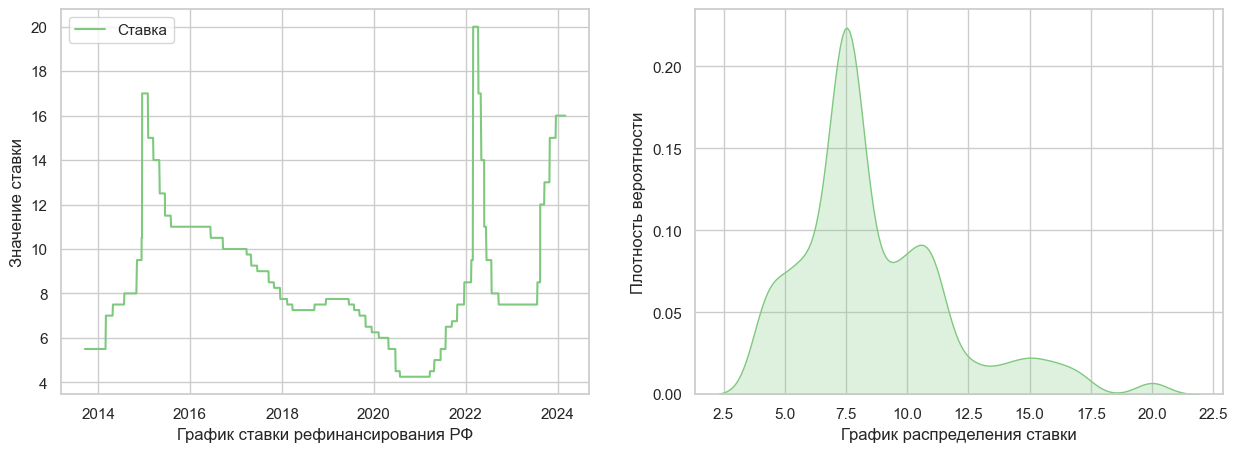

In [37]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.set_theme(style="whitegrid", palette="Accent")

sns.lineplot(x='date', y='key_rate', data=df, label='Ставка', ax=axes[0])
axes[0].set_xlabel('График ставки рефинансирования РФ')
axes[0].set_ylabel('Значение ставки')
axes[0].legend(loc='best')
axes[0].grid(True)

sns.kdeplot(x=df['key_rate'], ax=axes[1], fill=True)
axes[1].grid(True)
axes[1].set_xlabel('График распределения ставки')
axes[1].set_ylabel('Плотность вероятности')
plt.show()

In [49]:
def create_features(data, col_datetime):
    """Создание сезонов"""

    data = data.copy()
    data['weekday'] = data[col_datetime].dt.day_name().astype(cat_day)
    data['month'] = data[col_datetime].dt.month_name().astype(cat_month)
    data['year'] = data[col_datetime].dt.year
    data['quarter'] = data['date'].dt.quarter
    data['date_offset'] = (data[col_datetime].dt.month * 100 + data.date.dt.day - 320) % 1300
    data['season'] = data[col_datetime].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})
    return data

cat_day = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered= True)
cat_month = CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered= True)


df_features = create_features(data=df, col_datetime='date')

In [51]:
df_features

,date,key_rate,weekday,month,year,quarter,date_offset,season
0,2024-03-01,16.0,Friday,March,2024,1,1281,Spring
1,2024-02-29,16.0,Thursday,February,2024,1,1209,Winter
2,2024-02-28,16.0,Wednesday,February,2024,1,1208,Winter
3,2024-02-27,16.0,Tuesday,February,2024,1,1207,Winter
4,2024-02-26,16.0,Monday,February,2024,1,1206,Winter
...,...,...,...,...,...,...,...,...
2607,2013-09-23,5.5,Monday,September,2013,3,603,Autumn
2608,2013-09-20,5.5,Friday,September,2013,3,600,Autumn
2609,2013-09-19,5.5,Thursday,September,2013,3,599,Autumn
2610,2013-09-18,5.5,Wednesday,September,2013,3,598,Autumn
